# Classification Buying version 1
Goal, pick when to buy from 'BTCUSDT-hour-target-classification.csv'

In [192]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline # we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [193]:
df = pd.read_csv("data/BTCUSDT-hour-target-classification.csv")
df = df.dropna()
df = df[0:29000]

In [165]:
# df.iloc[28999]

## Skip Data Exploratory, getting benchmark classification score

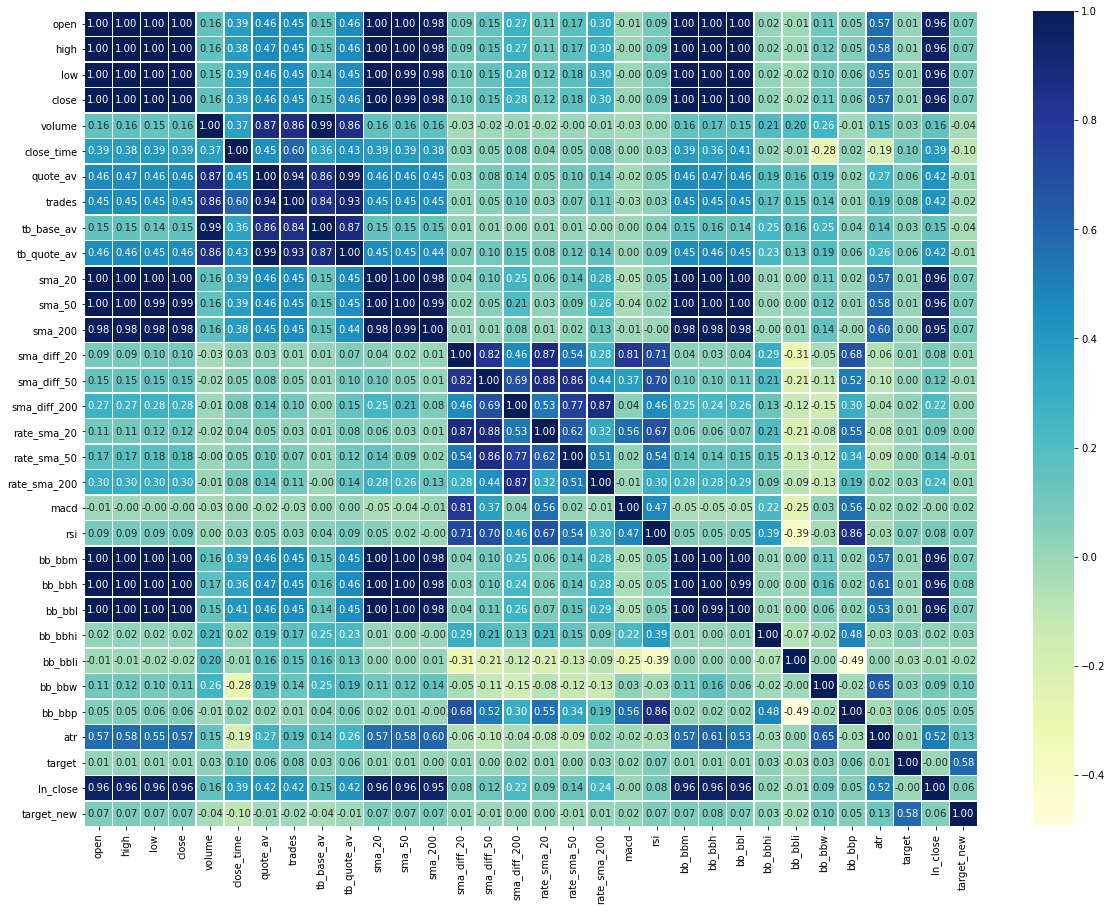

In [142]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [194]:
# Split data into X and y
X = df.drop(["timestamp", "target_new", "target", "open", "high", "low", "close", "ln_close", "close_time"], axis=1)
y = df["target_new"]

In [195]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [196]:
# Put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [197]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Volumes/Storage/Programming/sideprojects/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8277586206896552,
 'KNN': 0.8017241379310345,
 'Random Forest': 0.9803448275862069}

In [198]:
rf = RandomForestClassifier()

In [199]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
rf.score(X_test, y_test)

0.9793103448275862

In [201]:
a = rf.predict(X_test)

In [202]:
for i in range(10):
    print(f"guess {a[i]} actual {y_test.iloc[i]}")

guess 0 actual 0
guess 0 actual 0
guess 0 actual 0
guess 0 actual 0
guess 0 actual 0
guess 0 actual 0
guess 1 actual 1
guess 0 actual 0
guess 0 actual 0
guess 1 actual 1


In [203]:
feature_dict = dict(zip(X.columns, list(rf.feature_importances_)))
feature_dict

{'volume': 0.02370808090474257,
 'quote_av': 0.021621951980587615,
 'trades': 0.04988695964761648,
 'tb_base_av': 0.02263717132664878,
 'tb_quote_av': 0.018951704141428553,
 'sma_20': 0.06614439427154584,
 'sma_50': 0.08094157109332835,
 'sma_200': 0.10442539638755235,
 'sma_diff_20': 0.017440942287805714,
 'sma_diff_50': 0.029921880236853476,
 'sma_diff_200': 0.06411674967280684,
 'rate_sma_20': 0.020272032039527352,
 'rate_sma_50': 0.03497682966129699,
 'rate_sma_200': 0.07743310007940088,
 'macd': 0.019850295424709195,
 'rsi': 0.02170963079740388,
 'bb_bbm': 0.06723507472575097,
 'bb_bbh': 0.06537533788215111,
 'bb_bbl': 0.06785624057728377,
 'bb_bbhi': 0.0007663446295956978,
 'bb_bbli': 0.0005418644110958001,
 'bb_bbw': 0.033566795060896326,
 'bb_bbp': 0.016227225265241094,
 'atr': 0.07439242749473045}

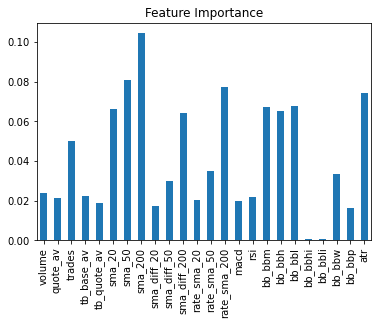

In [204]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [205]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp,atr,target,ln_close,target_new
0,2017-08-25 12:00:00.000,4361.27,4361.27,4261.13,4309.69,110.998609,1503665999999,4.792662e+05,1891.0,7.918988,...,4410.014255,4182.823745,0.0,0.0,5.287904,0.558414,57.330282,173.445578,8.368621,0
1,2017-08-25 13:00:00.000,4311.69,4345.00,4297.66,4312.00,20.801018,1503669599999,8.978516e+04,188.0,4.482264,...,4404.864512,4200.355488,0.0,0.0,4.753139,0.545915,56.616690,171.332513,8.369157,0
2,2017-08-25 14:00:00.000,4303.82,4340.00,4291.52,4305.00,10.610266,1503673199999,4.580427e+04,139.0,6.107378,...,4401.965291,4211.654709,0.0,0.0,4.418829,0.490489,56.035498,178.305025,8.367532,0
3,2017-08-25 15:00:00.000,4321.50,4422.29,4321.50,4394.36,21.796763,1503676799999,9.534934e+04,189.0,5.421801,...,4408.584109,4222.864891,0.0,0.0,4.303315,0.923411,60.410820,88.998492,8.388077,0
4,2017-08-25 16:00:00.000,4394.36,4453.91,4375.29,4447.31,17.784780,1503680399999,7.847508e+04,179.0,3.762923,...,4420.360065,4236.469935,1.0,0.0,4.248440,1.146555,61.711475,36.173266,8.400055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,2020-12-20 05:00:00,23426.15,23588.88,23397.58,23481.38,2113.937874,1608443999999,4.964819e+07,53921.0,986.709435,...,24196.185259,22873.291741,0.0,0.0,5.621025,0.459665,281.847339,966.757085,10.063963,0
28996,2020-12-20 06:00:00,23481.38,23614.84,23459.98,23506.67,1518.982809,1608447599999,3.576299e+07,37908.0,713.454676,...,24177.382782,22940.762218,0.0,0.0,5.249021,0.457624,272.776815,959.139849,10.065039,0
28997,2020-12-20 07:00:00,23506.67,23646.31,23410.62,23628.88,2081.734038,1608451199999,4.897732e+07,62654.0,1085.449936,...,24132.632530,23059.546470,0.0,0.0,4.547728,0.530557,270.127757,853.853769,10.070225,0
28998,2020-12-20 08:00:00,23628.89,23791.00,23532.00,23698.49,2953.113346,1608454799999,6.994207e+07,73961.0,1578.064359,...,24102.384839,23155.490161,0.0,0.0,4.007352,0.573453,269.332917,800.165779,10.073167,0


In [206]:
df_test = pd.read_csv("data/BTCUSDT-hour-test-features.csv")

In [207]:
# df_test.iloc[67]

In [208]:
filtered = df_test.drop(["timestamp", "open", "high", "low", "close", "close_time"], axis=1)
results = rf.predict(filtered)
# filtered

In [209]:
df_test["results"] = results

In [225]:
test = df_test[:]

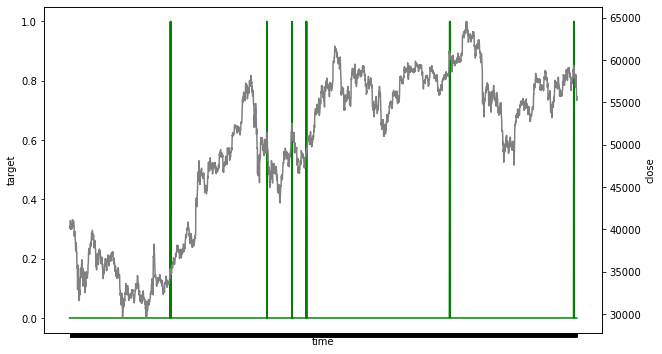

In [226]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(test.timestamp,
         test.results,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(test.timestamp,
         test.close,
         color="gray")
ax2.set_ylabel("close")
plt.show()

In [85]:
df_test

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,rsi,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp,atr,results
0,2021-01-09 08:00:00,39639.21,40254.42,39290.86,40172.14,3081.993289,1610182799999,1.228806e+08,90034.0,1584.085940,...,52.976509,40277.4360,41649.958848,38904.913152,0.0,0.0,6.815344,0.461641,984.488459,0
1,2021-01-09 09:00:00,40167.54,40790.00,40164.03,40348.35,3653.415447,1610186399999,1.479126e+08,104095.0,1909.708821,...,54.288780,40229.2945,41518.413959,38940.175041,0.0,0.0,6.408859,0.546177,958.879998,0
2,2021-01-09 10:00:00,40348.36,40800.00,40105.51,40376.03,3130.356558,1610189999999,1.265966e+08,79151.0,1730.685269,...,54.503567,40175.3895,41339.205570,39011.573430,0.0,0.0,5.793677,0.586199,939.994998,0
3,2021-01-09 11:00:00,40376.03,41237.44,40256.73,40565.77,4682.991247,1610193599999,1.911148e+08,116488.0,2464.970705,...,56.028776,40162.2240,41301.869408,39022.578592,0.0,0.0,5.675211,0.677049,942.903213,0
4,2021-01-09 12:00:00,40565.77,40912.48,40410.01,40874.99,2732.201204,1610197199999,1.111292e+08,70238.0,1257.347035,...,58.472123,40140.8025,41207.619048,39073.985952,0.0,0.0,5.315372,0.844102,911.443697,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2021-05-10 17:00:00,57572.32,57693.44,56849.75,56985.30,4085.398456,1620669599999,2.342138e+08,106825.0,1752.384538,...,40.823732,58236.0860,59603.617448,56868.554552,0.0,0.0,4.696509,0.042685,745.450773,0
2906,2021-05-10 18:00:00,56985.30,57195.32,56388.26,56771.88,4418.643856,1620673199999,2.509665e+08,115203.0,1958.603297,...,39.283799,58178.1640,59683.754815,56672.573185,0.0,0.0,5.175793,0.032979,749.851432,0
2907,2021-05-10 19:00:00,56771.87,56977.48,55516.85,55733.76,6241.027982,1620676799999,3.510041e+08,166920.0,2968.313340,...,32.802112,58052.8100,59896.226862,56209.393138,0.0,1.0,6.350827,-0.129009,800.621330,0
2908,2021-05-10 20:00:00,55733.76,55739.62,53400.00,55240.88,11462.110082,1620680399999,6.289198e+08,326389.0,5613.194201,...,30.250117,57871.9240,60044.212496,55699.635504,0.0,1.0,7.507227,-0.105593,910.549806,0
